In [25]:
from statsbombpy import sb
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mplsoccer import Pitch, Sbopen
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows", None)

In [26]:
competitionId = 9 # Bundesliga
seasonId = 27 # 2015/2016

matches = sb.matches(competition_id = competitionId, season_id = seasonId)
match_ids = matches['match_id'].tolist()
print(match_ids)
print(len(match_ids))

[3890561, 3890505, 3890511, 3890515, 3890411, 3890397, 3890401, 3890396, 3890384, 3890385, 3890282, 3890287, 3890269, 3890268, 3890402, 3890564, 3890563, 3890562, 3890560, 3890559, 3890558, 3890557, 3890556, 3890555, 3890554, 3890553, 3890552, 3890551, 3890550, 3890549, 3890548, 3890547, 3890546, 3890545, 3890544, 3890543, 3890542, 3890541, 3890540, 3890539, 3890538, 3890537, 3890536, 3890535, 3890534, 3890533, 3890532, 3890531, 3890530, 3890529, 3890528, 3890527, 3890526, 3890525, 3890524, 3890523, 3890522, 3890521, 3890520, 3890519, 3890518, 3890517, 3890516, 3890514, 3890513, 3890512, 3890510, 3890509, 3890508, 3890507, 3890506, 3890504, 3890503, 3890502, 3890501, 3890500, 3890499, 3890498, 3890497, 3890496, 3890495, 3890494, 3890493, 3890492, 3890491, 3890490, 3890489, 3890488, 3890487, 3890486, 3890485, 3890484, 3890483, 3890482, 3890481, 3890480, 3890479, 3890478, 3890477, 3890476, 3890475, 3890474, 3890473, 3890472, 3890471, 3890470, 3890469, 3890468, 3890467, 3890466, 3890465, 

In [27]:
parser = Sbopen()
matchId = 3890438
df, related, freeze, tactics = parser.event(matchId)

df.head()

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,...,foul_committed_card_name,block_offensive,substitution_replacement_id,substitution_replacement_name,dribble_nutmeg,pass_deflected,block_deflection,shot_one_on_one,pass_no_touch,ball_recovery_offensive
0,afd96045-7e3b-4c33-bb2a-0bb9e333f601,1,1,00:00:00,0,0,1,0.000000,3890438,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,fc15e6f1-095d-436a-af39-7e23bec50d39,2,1,00:00:00,0,0,1,0.000000,3890438,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0b71b865-f5de-4c06-b9ba-d6b97449eecc,3,1,00:00:00,0,0,1,0.000000,3890438,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4549edfa-9337-4e34-9e9a-d0bfc6b89e34,4,1,00:00:00,0,0,1,0.000000,3890438,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0e6ddd7f-1af2-415d-8b76-11651d09092f,5,1,00:00:00.040000,0,0,2,0.616223,3890438,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
teams = df['team_name'].unique()

team1 = df[df['team_name'] == teams[0]]
team2 = df[df['team_name'] == teams[1]]

passesTeam1 = team1[team1['type_name'] == 'Pass']
passesTeam2 = team2[team2['type_name'] == 'Pass']

In [29]:
passesTeam1 = passesTeam1[['id','minute','player_id','player_name','x','y','end_x', 'end_y','pass_recipient_id','pass_recipient_name','outcome_id','outcome_name']]
passesTeam2 = passesTeam2[['id','minute','player_id','player_name','x','y','end_x', 'end_y','pass_recipient_id','pass_recipient_name','outcome_id','outcome_name']]

passesTeam1.head()

,id,minute,player_id,player_name,x,y,end_x,end_y,pass_recipient_id,pass_recipient_name,outcome_id,outcome_name
4,0e6ddd7f-1af2-415d-8b76-11651d09092f,0,8895.0,Pierre-Michel Lasogga,61.0,40.1,62.3,39.3,8308.0,Aaron Hunt,NaN,NaN
7,cbccb66a-dad6-47d0-8274-579d6f9033c8,0,8308.0,Aaron Hunt,60.1,38.7,44.5,41.0,8891.0,Lewis Harry Holtby,NaN,NaN
9,2836af56-9ddc-49da-afa1-f616262f3300,0,8891.0,Lewis Harry Holtby,45.0,42.1,50.3,51.3,9407.0,Gojko Kačar,NaN,NaN
11,5ffad3f3-29ea-4540-a7d2-8c9f339c38df,0,9407.0,Gojko Kačar,50.1,49.3,34.8,47.9,6359.0,Johan Danon Djourou-Gbadjere,NaN,NaN
14,622acb60-95d3-4aed-9fe1-b166c9cd1945,0,6359.0,Johan Danon Djourou-Gbadjere,37.2,51.3,44.0,76.7,6339.0,Gotoku Sakai,NaN,NaN


In [30]:
successfulPassesTeam1 = passesTeam1[passesTeam1['outcome_name'].isnull()]
successfulPassesTeam2 = passesTeam2[passesTeam2['outcome_name'].isnull()]

successfulPassesTeam1.head()

,id,minute,player_id,player_name,x,y,end_x,end_y,pass_recipient_id,pass_recipient_name,outcome_id,outcome_name
4,0e6ddd7f-1af2-415d-8b76-11651d09092f,0,8895.0,Pierre-Michel Lasogga,61.0,40.1,62.3,39.3,8308.0,Aaron Hunt,NaN,NaN
7,cbccb66a-dad6-47d0-8274-579d6f9033c8,0,8308.0,Aaron Hunt,60.1,38.7,44.5,41.0,8891.0,Lewis Harry Holtby,NaN,NaN
9,2836af56-9ddc-49da-afa1-f616262f3300,0,8891.0,Lewis Harry Holtby,45.0,42.1,50.3,51.3,9407.0,Gojko Kačar,NaN,NaN
11,5ffad3f3-29ea-4540-a7d2-8c9f339c38df,0,9407.0,Gojko Kačar,50.1,49.3,34.8,47.9,6359.0,Johan Danon Djourou-Gbadjere,NaN,NaN
14,622acb60-95d3-4aed-9fe1-b166c9cd1945,0,6359.0,Johan Danon Djourou-Gbadjere,37.2,51.3,44.0,76.7,6339.0,Gotoku Sakai,NaN,NaN


In [31]:
subsTeam1 = team1[team1['type_name'] == 'Substitution']
subsTeam2 = team2[team2['type_name'] == 'Substitution']

firstSubTeam1 = subsTeam1['minute'].min() if not subsTeam1.empty else 150
firstSubTeam2 = subsTeam2['minute'].min() if not subsTeam2.empty else 150

print(firstSubTeam1, firstSubTeam2)

45 150


In [32]:
successfulPassesTeam1 = successfulPassesTeam1[successfulPassesTeam1['minute'] < firstSubTeam1]
successfulPassesTeam2 = successfulPassesTeam2[successfulPassesTeam2['minute'] < firstSubTeam2]

successfulPassesTeam1.head()  

,id,minute,player_id,player_name,x,y,end_x,end_y,pass_recipient_id,pass_recipient_name,outcome_id,outcome_name
4,0e6ddd7f-1af2-415d-8b76-11651d09092f,0,8895.0,Pierre-Michel Lasogga,61.0,40.1,62.3,39.3,8308.0,Aaron Hunt,NaN,NaN
7,cbccb66a-dad6-47d0-8274-579d6f9033c8,0,8308.0,Aaron Hunt,60.1,38.7,44.5,41.0,8891.0,Lewis Harry Holtby,NaN,NaN
9,2836af56-9ddc-49da-afa1-f616262f3300,0,8891.0,Lewis Harry Holtby,45.0,42.1,50.3,51.3,9407.0,Gojko Kačar,NaN,NaN
11,5ffad3f3-29ea-4540-a7d2-8c9f339c38df,0,9407.0,Gojko Kačar,50.1,49.3,34.8,47.9,6359.0,Johan Danon Djourou-Gbadjere,NaN,NaN
14,622acb60-95d3-4aed-9fe1-b166c9cd1945,0,6359.0,Johan Danon Djourou-Gbadjere,37.2,51.3,44.0,76.7,6339.0,Gotoku Sakai,NaN,NaN


In [33]:
averagePosTeam1 = successfulPassesTeam1.groupby('player_name').agg({'x':'mean', 'y':['mean', 'count'] }).reset_index()
averagePosTeam2 = successfulPassesTeam2.groupby('player_name').agg({'x':'mean', 'y':['mean', 'count']}).reset_index()

averagePosTeam1.columns = ['player_name', 'x', 'y', 'count']
averagePosTeam2.columns = ['player_name', 'x', 'y', 'count']

averagePosTeam1.head()

,player_name,x,y,count
0,Aaron Hunt,64.075000,37.225000,20
1,Emir Spahić,41.796774,27.570968,31
2,Gojko Kačar,54.122222,42.107407,27
3,Gotoku Sakai,66.173684,68.952632,19
4,Johan Danon Djourou-Gbadjere,36.148649,56.675676,37


In [34]:
passesToTeam1 = successfulPassesTeam1.groupby(['player_name','pass_recipient_name']).id.count().reset_index()
passesToTeam1.rename(columns={'id':'pass_count'},inplace=True)

passesToTeam2 = successfulPassesTeam2.groupby(['player_name','pass_recipient_name']).id.count().reset_index()
passesToTeam2.rename(columns={'id':'pass_count'},inplace=True)

passesToTeam1.head()

,player_name,pass_recipient_name,pass_count
0,Aaron Hunt,Emir Spahić,2
1,Aaron Hunt,Gojko Kačar,5
2,Aaron Hunt,Johan Danon Djourou-Gbadjere,2
3,Aaron Hunt,Lewis Harry Holtby,7
4,Aaron Hunt,Matthias Ostrzolek,3


In [35]:
passesToTeam1['sorted_pair'] = passesToTeam1.apply(
    lambda row: tuple(sorted([row['player_name'], row['pass_recipient_name']])),
    axis=1
)

grouped = passesToTeam1.groupby('sorted_pair', as_index=False)['pass_count'].sum()
grouped[['player_a', 'player_b']] = pd.DataFrame(grouped['sorted_pair'].tolist(), index=grouped.index)
passesBetweenTeam1 = grouped[['player_a', 'player_b', 'pass_count']]
passesBetweenTeam1 = passesBetweenTeam1.sort_values(by=['player_a', 'player_b']).reset_index(drop=True)

passesToTeam2['sorted_pair'] = passesToTeam2.apply(
    lambda row: tuple(sorted([row['player_name'], row['pass_recipient_name']])),
    axis=1
)

grouped = passesToTeam2.groupby('sorted_pair', as_index=False)['pass_count'].sum()
grouped[['player_a', 'player_b']] = pd.DataFrame(grouped['sorted_pair'].tolist(), index=grouped.index)
passesBetweenTeam2 = grouped[['player_a', 'player_b', 'pass_count']]
passesBetweenTeam2 = passesBetweenTeam2.sort_values(by=['player_a', 'player_b']).reset_index(drop=True)

passesBetweenTeam1.head()

,player_a,player_b,pass_count
0,Aaron Hunt,Emir Spahić,2
1,Aaron Hunt,Gojko Kačar,7
2,Aaron Hunt,Gotoku Sakai,6
3,Aaron Hunt,Johan Danon Djourou-Gbadjere,3
4,Aaron Hunt,Lewis Harry Holtby,10


In [36]:
passesBetweenTeam1 = pd.merge(passesBetweenTeam1, averagePosTeam1, left_on='player_a', right_on='player_name')
passesBetweenTeam2 = pd.merge(passesBetweenTeam2, averagePosTeam2, left_on='player_a', right_on='player_name')

passesBetweenTeam1.head()

,player_a,player_b,pass_count,player_name,x,y,count
0,Aaron Hunt,Emir Spahić,2,Aaron Hunt,64.075,37.225,20
1,Aaron Hunt,Gojko Kačar,7,Aaron Hunt,64.075,37.225,20
2,Aaron Hunt,Gotoku Sakai,6,Aaron Hunt,64.075,37.225,20
3,Aaron Hunt,Johan Danon Djourou-Gbadjere,3,Aaron Hunt,64.075,37.225,20
4,Aaron Hunt,Lewis Harry Holtby,10,Aaron Hunt,64.075,37.225,20


In [37]:
passesBetweenTeam1 = pd.merge(passesBetweenTeam1, averagePosTeam1, left_on='player_b', right_on='player_name', suffixes=('', '_end'))
passesBetweenTeam2 = pd.merge(passesBetweenTeam2, averagePosTeam2, left_on='player_b', right_on='player_name', suffixes=('', '_end'))

passesBetweenTeam1.head()

,player_a,player_b,pass_count,player_name,x,y,count,player_name_end,x_end,y_end,count_end
0,Aaron Hunt,Emir Spahić,2,Aaron Hunt,64.075,37.225,20,Emir Spahić,41.796774,27.570968,31
1,Aaron Hunt,Gojko Kačar,7,Aaron Hunt,64.075,37.225,20,Gojko Kačar,54.122222,42.107407,27
2,Aaron Hunt,Gotoku Sakai,6,Aaron Hunt,64.075,37.225,20,Gotoku Sakai,66.173684,68.952632,19
3,Aaron Hunt,Johan Danon Djourou-Gbadjere,3,Aaron Hunt,64.075,37.225,20,Johan Danon Djourou-Gbadjere,36.148649,56.675676,37
4,Aaron Hunt,Lewis Harry Holtby,10,Aaron Hunt,64.075,37.225,20,Lewis Harry Holtby,55.967500,32.395000,40


In [38]:
passesBetweenTeam1 = passesBetweenTeam1[['player_a', 'x', 'y', 'count', 'player_b', 'x_end', 'y_end', 'count_end', 'pass_count']]
passesBetweenTeam2 = passesBetweenTeam2[['player_a', 'x', 'y', 'count', 'player_b', 'x_end', 'y_end', 'count_end', 'pass_count']]

passesBetweenTeam1.head()

,player_a,x,y,count,player_b,x_end,y_end,count_end,pass_count
0,Aaron Hunt,64.075,37.225,20,Emir Spahić,41.796774,27.570968,31,2
1,Aaron Hunt,64.075,37.225,20,Gojko Kačar,54.122222,42.107407,27,7
2,Aaron Hunt,64.075,37.225,20,Gotoku Sakai,66.173684,68.952632,19,6
3,Aaron Hunt,64.075,37.225,20,Johan Danon Djourou-Gbadjere,36.148649,56.675676,37,3
4,Aaron Hunt,64.075,37.225,20,Lewis Harry Holtby,55.967500,32.395000,40,10


In [39]:
lineup = parser.lineup(matchId)
team1Lineup = lineup[lineup['team_name'] == teams[0]]
team2Lineup = lineup[lineup['team_name'] == teams[1]]

team1Lineup = team1Lineup[['player_name', 'player_nickname']]
team2Lineup = team2Lineup[['player_name', 'player_nickname']]

team1Lineup.head()

,player_name,player_nickname
18,Josip Drmic,Josip Drmic
19,Gotoku Sakai,Gotoku Sakai
20,Johan Danon Djourou-Gbadjere,Johan Djourou
21,Nicolai Müller,Nicolai Müller
22,Aaron Hunt,Aaron Hunt


In [40]:
averagePosTeam1 = pd.merge(averagePosTeam1, team1Lineup, on='player_name', how='left')
averagePosTeam2 = pd.merge(averagePosTeam2, team2Lineup, on='player_name', how='left')

averagePosTeam1.head()

,player_name,x,y,count,player_nickname
0,Aaron Hunt,64.075000,37.225000,20,Aaron Hunt
1,Emir Spahić,41.796774,27.570968,31,Emir Spahić
2,Gojko Kačar,54.122222,42.107407,27,Gojko Kačar
3,Gotoku Sakai,66.173684,68.952632,19,Gotoku Sakai
4,Johan Danon Djourou-Gbadjere,36.148649,56.675676,37,Johan Djourou


In [41]:
goals = df[df['type_name'] == 'Shot']
goals = goals[goals['outcome_name'] == 'Goal']
goals = goals[['minute', 'team_name']]

team1Goals = goals[goals['team_name'] == teams[0]]
team2Goals = goals[goals['team_name'] == teams[1]]

team1Goals = team1Goals[team1Goals['minute'] < firstSubTeam1]
team2Goals = team2Goals[team2Goals['minute'] < firstSubTeam2]

team1Goals = len(team1Goals)
team2Goals = len(team2Goals)

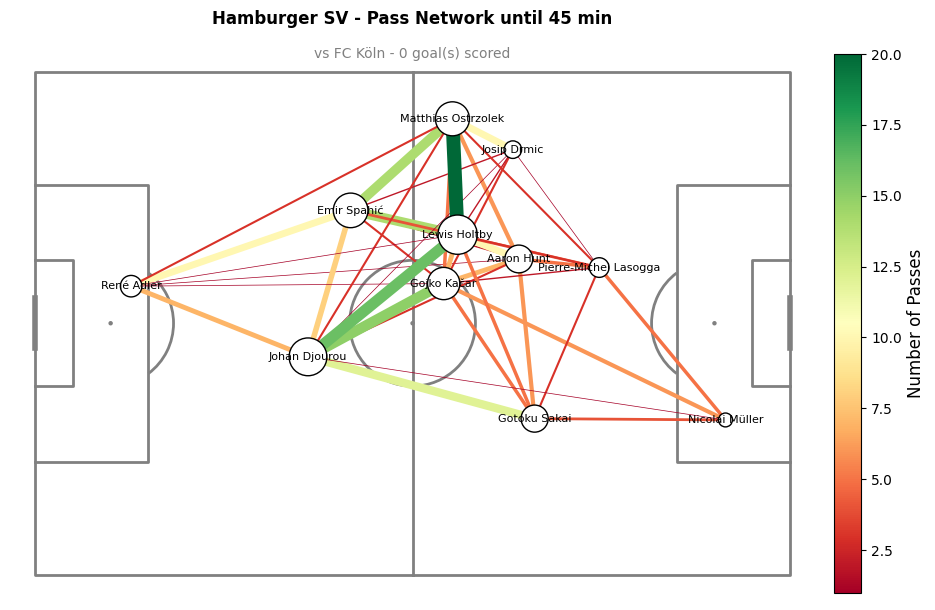

In [42]:
pass_between = passesBetweenTeam1
average_locations = averagePosTeam1
norm = colors.Normalize(vmin=pass_between['pass_count'].min(), vmax=pass_between['pass_count'].max())
cmap = cm.RdYlGn
scalar_map = cm.ScalarMappable(norm=norm, cmap=cmap)
pass_colors = scalar_map.to_rgba(pass_between['pass_count'])

pitch = Pitch(pitch_color='white', line_color='gray')
fig, ax = pitch.draw(figsize=(10, 8))

pitch.lines(
    1.2 * pass_between['x'], 
    0.8 * pass_between['y'],
    1.2 * pass_between['x_end'], 
    0.8 * pass_between['y_end'],
    lw=pass_between['pass_count'] * 0.5,
    color=pass_colors,
    zorder=1,
    ax=ax
)

scalar_map.set_array(pass_between['pass_count'])
cbar = plt.colorbar(scalar_map, ax=ax, orientation='vertical', pad=0.02, shrink=0.7)
cbar.set_label('Number of Passes', fontsize=12)

nodes = pitch.scatter(1.2*average_locations.x,0.8*average_locations.y,s=20*average_locations['count'].values,color='white',edgecolors='black',linewidth=1,ax=ax)

for index,row in average_locations.iterrows():
    pitch.annotate(row['player_nickname'], xy=(1.2*row["x"],0.8*row["y"]), c='black', va='center', ha='center', size=8, ax=ax)

title = team1[team1['team_name'] == teams[0]]['team_name'].values[0] + ' - Pass Network until '  + str(firstSubTeam1) + ' min'
    
ax.set_title(title,va='center',ha='center',fontsize=12,fontweight='bold',pad=20)

subtitle = 'vs ' + team2[team2['team_name'] == teams[1]]['team_name'].values[0] + ' - ' + str(team1Goals) + ' goal(s) scored'

ax.annotate(subtitle, xy=(0.5, 1), xytext=(0, 0),
             xycoords='axes fraction', textcoords='offset points',
             fontsize=10, color='gray', va='top', ha='center')


plt.tight_layout()
plt.show()

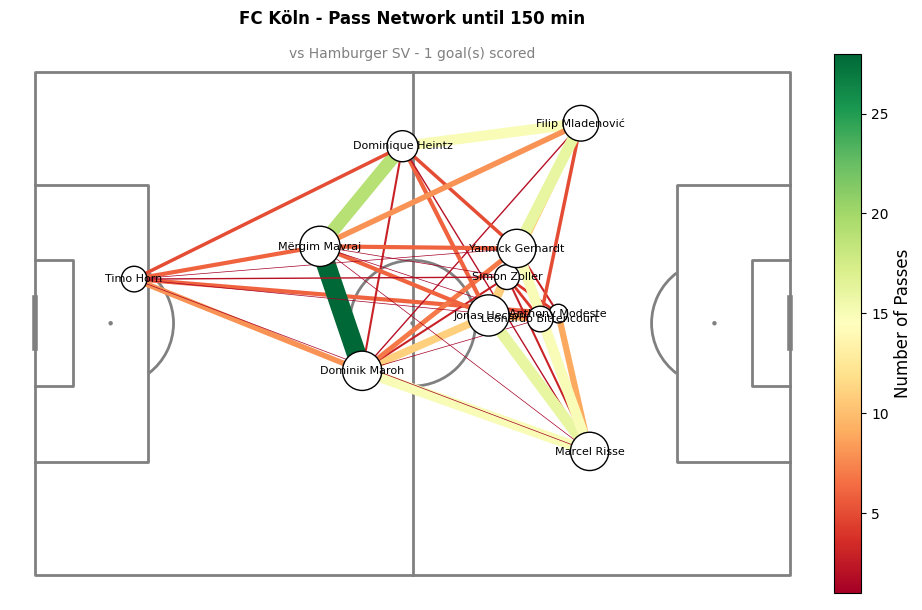

In [43]:
pass_between = passesBetweenTeam2
average_locations = averagePosTeam2
norm = colors.Normalize(vmin=pass_between['pass_count'].min(), vmax=pass_between['pass_count'].max())
cmap = cm.RdYlGn
scalar_map = cm.ScalarMappable(norm=norm, cmap=cmap)
pass_colors = scalar_map.to_rgba(pass_between['pass_count'])

pitch = Pitch(pitch_color='white', line_color='gray')
fig, ax = pitch.draw(figsize=(10, 8))

pitch.lines(
    1.2 * pass_between['x'], 
    0.8 * pass_between['y'],
    1.2 * pass_between['x_end'], 
    0.8 * pass_between['y_end'],
    lw=pass_between['pass_count'] * 0.5,
    color=pass_colors,
    zorder=1,
    ax=ax
)

scalar_map.set_array(pass_between['pass_count'])
cbar = plt.colorbar(scalar_map, ax=ax, orientation='vertical', pad=0.02, shrink=0.7)
cbar.set_label('Number of Passes', fontsize=12)

nodes = pitch.scatter(1.2*average_locations.x,0.8*average_locations.y,s=20*average_locations['count'].values,color='white',edgecolors='black',linewidth=1,ax=ax)

for index,row in average_locations.iterrows():
    pitch.annotate(row['player_nickname'], xy=(1.2*row["x"],0.8*row["y"]), c='black', va='center', ha='center', size=8, ax=ax)

title = team2[team2['team_name'] == teams[1]]['team_name'].values[0] + ' - Pass Network until '  + str(firstSubTeam2) + ' min'
    
ax.set_title(title,va='center',ha='center',fontsize=12,fontweight='bold',pad=20)

subtitle = 'vs ' + team1[team1['team_name'] == teams[0]]['team_name'].values[0] + ' - ' + str(team2Goals) + ' goal(s) scored'

ax.annotate(subtitle, xy=(0.5, 1), xytext=(0, 0),
             xycoords='axes fraction', textcoords='offset points',
             fontsize=10, color='gray', va='top', ha='center')


plt.tight_layout()
plt.show()